In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("../data/BPD_CRIME_DATA_W_IMPUTED_DEMO.csv")

In [6]:
df.head()


,Unnamed: 0,Description,Post,District,Neighborhood,Longitude,Latitude,Premise,Month,Hour,...,Outside,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Season_autumn,Season_spring,Season_summer,Season_winter
0,0,11,913.0,6,26,-76.60541,39.22951,93,9,23,...,0,0,0,1,0,0,0,0,1,0
1,1,3,133.0,0,214,-76.63217,39.31360,103,9,23,...,1,0,0,0,1,0,0,0,1,0
2,2,14,524.0,3,268,-76.60697,39.34768,103,9,22,...,1,1,0,0,0,0,0,0,1,0
3,3,0,934.0,6,37,-76.64526,39.28315,93,9,22,...,0,0,0,0,0,1,0,0,1,0
4,4,5,113.0,0,63,-76.61365,39.28756,103,9,22,...,1,0,1,0,0,0,0,0,1,0


In [7]:
df = df.drop(columns="Unnamed: 0")


In [8]:
df.head()


,Description,Post,District,Neighborhood,Longitude,Latitude,Premise,Month,Hour,Year,...,Outside,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Season_autumn,Season_spring,Season_summer,Season_winter
0,11,913.0,6,26,-76.60541,39.22951,93,9,23,2017,...,0,0,0,1,0,0,0,0,1,0
1,3,133.0,0,214,-76.63217,39.31360,103,9,23,2017,...,1,0,0,0,1,0,0,0,1,0
2,14,524.0,3,268,-76.60697,39.34768,103,9,22,2017,...,1,1,0,0,0,0,0,0,1,0
3,0,934.0,6,37,-76.64526,39.28315,93,9,22,2017,...,0,0,0,0,0,1,0,0,1,0
4,5,113.0,0,63,-76.61365,39.28756,103,9,22,2017,...,1,0,1,0,0,0,0,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263121 entries, 0 to 263120
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Description               263121 non-null  int64  
 1   Post                      263121 non-null  float64
 2   District                  263121 non-null  int64  
 3   Neighborhood              263121 non-null  int64  
 4   Longitude                 263121 non-null  float64
 5   Latitude                  263121 non-null  float64
 6   Premise                   263121 non-null  int64  
 7   Month                     263121 non-null  int64  
 8   Hour                      263121 non-null  int64  
 9   Year                      263121 non-null  int64  
 10  median_household_income   263121 non-null  float64
 11  households_below_poverty  263121 non-null  float64
 12  perc18_24                 263121 non-null  float64
 13  perc25_64                 263121 non-null  f

In [11]:
df = df.drop(columns=["Post", "District","Longitude","Latitude","Year","Season_autumn","Season_spring","Season_summer","Season_winter"])


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263121 entries, 0 to 263120
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Description               263121 non-null  int64  
 1   Neighborhood              263121 non-null  int64  
 2   Premise                   263121 non-null  int64  
 3   Month                     263121 non-null  int64  
 4   Hour                      263121 non-null  int64  
 5   median_household_income   263121 non-null  float64
 6   households_below_poverty  263121 non-null  float64
 7   perc18_24                 263121 non-null  float64
 8   perc25_64                 263121 non-null  float64
 9   perc65up                  263121 non-null  float64
 10  perc_asian                263121 non-null  float64
 11  perc_aa                   263121 non-null  float64
 12  perc_hisp                 263121 non-null  float64
 13  pwhi                      263121 non-null  f

In [13]:
X = df.drop(columns = ['Description'])
y = df['Description']


Let's test out random forest and compare to the old version



In [14]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42069, n_estimators=100)


In [16]:
import timeit
from sklearn.model_selection import cross_val_score

In [17]:
start = timeit.default_timer()
scores = cross_val_score(RF, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  42.794005200000015


In [22]:
np.mean(scores)

0.3494268735205196

Roughly the same....

In [23]:
import lightgbm as lgb

In [25]:
clf = lgb.LGBMClassifier(objective='multiclass',
                         random_state=42069, silent=True,
                         n_jobs=-1, n_estimators=100, class_weight='balanced')


In [27]:
start = timeit.default_timer()
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  26.592783000000054


In [28]:
np.mean(scores)


0.3817401630071062

Very marginally better. Let's try to tune this a little.


In [29]:
clf.fit(X,y)


LGBMClassifier(class_weight='balanced', objective='multiclass',
               random_state=42069)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

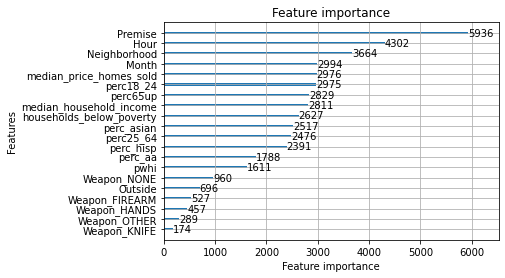

In [30]:
lgb.plot_importance(clf)


Looks like the new features work well. We can later try to drop the weapon type and the outside variable for a more generalizable model

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [35]:
LGBC = lgb.LGBMClassifier(objective='multiclass',num_class=15,
                         random_state=42069, silent=True,
                         n_jobs=-1)

In [36]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=2, high=20),
        'num_leaves': randint(low=4, high=40)
    }

In [37]:
LGBM_rand_search = RandomizedSearchCV(LGBC, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='f1_macro', random_state=42069)

In [38]:
LGBM_rand_search.fit(X,y)


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002512E99F460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002512E99FEB0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130624F40>},
                   random_state=42069, scoring='f1_macro')

In [39]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)

0.3907127029315588 {'max_depth': 11, 'n_estimators': 97, 'num_leaves': 10}
0.39802441828519003 {'max_depth': 16, 'n_estimators': 16, 'num_leaves': 36}
0.38888420443726524 {'max_depth': 10, 'n_estimators': 199, 'num_leaves': 7}
0.38128770377018906 {'max_depth': 7, 'n_estimators': 6, 'num_leaves': 15}
0.3888686190540488 {'max_depth': 12, 'n_estimators': 8, 'num_leaves': 12}
0.3876687514608196 {'max_depth': 14, 'n_estimators': 196, 'num_leaves': 22}
0.393412202956508 {'max_depth': 4, 'n_estimators': 114, 'num_leaves': 23}
0.39803899259858444 {'max_depth': 17, 'n_estimators': 37, 'num_leaves': 33}
0.3905838543995611 {'max_depth': 16, 'n_estimators': 186, 'num_leaves': 27}
0.39290646278251085 {'max_depth': 6, 'n_estimators': 51, 'num_leaves': 14}
0.3812540179938139 {'max_depth': 17, 'n_estimators': 77, 'num_leaves': 4}
0.3935849112539783 {'max_depth': 16, 'n_estimators': 167, 'num_leaves': 37}
0.39342813427830536 {'max_depth': 16, 'n_estimators': 136, 'num_leaves': 32}
0.3949806034612816 {'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

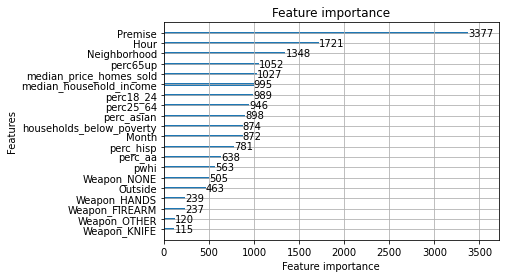

In [40]:
lgb.plot_importance(LGBM_rand_search.best_estimator_)


Let's try this with dart


In [41]:
LGB_DART = lgb.LGBMClassifier(objective='multiclass',num_class=15,
                         random_state=42069, silent=True,
                         n_jobs=-1, boosting_type="dart")
LGBM_rand_search = RandomizedSearchCV(LGB_DART, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='f1_macro', random_state=42069)


In [42]:
LGBM_rand_search.fit(X,y)


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(boosting_type='dart', num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002512E99F460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002512E99FEB0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130624F40>},
                   random_state=42069, scoring='f1_macro')

In [43]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)

0.38299209228191355 {'max_depth': 11, 'n_estimators': 97, 'num_leaves': 10}
0.39501056727819345 {'max_depth': 16, 'n_estimators': 16, 'num_leaves': 36}
0.3809199071154582 {'max_depth': 10, 'n_estimators': 199, 'num_leaves': 7}
0.38128770377018906 {'max_depth': 7, 'n_estimators': 6, 'num_leaves': 15}
0.38526869931466123 {'max_depth': 12, 'n_estimators': 8, 'num_leaves': 12}
0.3946929660454266 {'max_depth': 14, 'n_estimators': 196, 'num_leaves': 22}
0.38200898446779064 {'max_depth': 4, 'n_estimators': 114, 'num_leaves': 23}
0.39397608733830564 {'max_depth': 17, 'n_estimators': 37, 'num_leaves': 33}
0.3948914439711963 {'max_depth': 16, 'n_estimators': 186, 'num_leaves': 27}
0.3886501284985988 {'max_depth': 6, 'n_estimators': 51, 'num_leaves': 14}
0.34592284395862427 {'max_depth': 17, 'n_estimators': 77, 'num_leaves': 4}
0.39584990369734724 {'max_depth': 16, 'n_estimators': 167, 'num_leaves': 37}
0.39632344806094266 {'max_depth': 16, 'n_estimators': 136, 'num_leaves': 32}
0.388471488626749

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

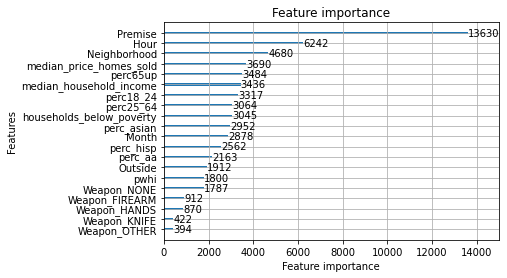

In [44]:
lgb.plot_importance(LGBM_rand_search.best_estimator_)


Wow premise is REALLY important in that one.


Let's try the earlier normal gbdt but let's remove the weapons from the model. Realistically the police may not know the type of weapon when they are dispatched.

In [45]:
X_mod = X.drop(columns=["Weapon_NONE","Weapon_FIREARM","Weapon_HANDS","Weapon_KNIFE","Weapon_OTHER"])


In [46]:
LGBM_rand_search = RandomizedSearchCV(LGBC, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='f1_macro', random_state=42069)


In [47]:
LGBM_rand_search.fit(X_mod,y)


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002512E99F460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002512E99FEB0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130624F40>},
                   random_state=42069, scoring='f1_macro')

In [48]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)

0.1857094026288368 {'max_depth': 11, 'n_estimators': 97, 'num_leaves': 10}
0.1886882770069729 {'max_depth': 16, 'n_estimators': 16, 'num_leaves': 36}
0.18507472907421474 {'max_depth': 10, 'n_estimators': 199, 'num_leaves': 7}
0.1664868067590049 {'max_depth': 7, 'n_estimators': 6, 'num_leaves': 15}
0.17170673006198992 {'max_depth': 12, 'n_estimators': 8, 'num_leaves': 12}
0.1912537733684516 {'max_depth': 14, 'n_estimators': 196, 'num_leaves': 22}
0.1864689890233055 {'max_depth': 4, 'n_estimators': 114, 'num_leaves': 23}
0.19196017825158018 {'max_depth': 17, 'n_estimators': 37, 'num_leaves': 33}
0.19013860113437048 {'max_depth': 16, 'n_estimators': 186, 'num_leaves': 27}
0.18819228501315005 {'max_depth': 6, 'n_estimators': 51, 'num_leaves': 14}
0.1736340790078322 {'max_depth': 17, 'n_estimators': 77, 'num_leaves': 4}
0.19378931044400088 {'max_depth': 16, 'n_estimators': 167, 'num_leaves': 37}
0.191993853310528 {'max_depth': 16, 'n_estimators': 136, 'num_leaves': 32}
0.18788145772284953 {

Oh jeez. Alright never mind that...

Let's tune the full lightgbm model. Let's see first is "balanced" class weights does anything.


In [52]:
LGBC = lgb.LGBMClassifier(objective='multiclass',num_class=15,
                         random_state=42069, silent=True,
                         n_jobs=-1, class_weight="balanced")


In [53]:
LGBM_rand_search = RandomizedSearchCV(LGBC, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='f1_macro', random_state=42069,
                                      n_jobs=-1)

In [54]:
LGBM_rand_search.fit(X,y)


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(class_weight='balanced',
                                            num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002512E99F460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002512E99FEB0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130624F40>},
                   random_state=42069, scoring='f1_macro')

In [55]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)


0.3737716023509803 {'max_depth': 11, 'n_estimators': 97, 'num_leaves': 10}
0.37115775079113067 {'max_depth': 16, 'n_estimators': 16, 'num_leaves': 36}
0.3724598851556195 {'max_depth': 10, 'n_estimators': 199, 'num_leaves': 7}
0.3630944149305413 {'max_depth': 7, 'n_estimators': 6, 'num_leaves': 15}
0.36452950038146587 {'max_depth': 12, 'n_estimators': 8, 'num_leaves': 12}
0.382109093617201 {'max_depth': 14, 'n_estimators': 196, 'num_leaves': 22}
0.37317612427108066 {'max_depth': 4, 'n_estimators': 114, 'num_leaves': 23}
0.3748149479750134 {'max_depth': 17, 'n_estimators': 37, 'num_leaves': 33}
0.3862079322887834 {'max_depth': 16, 'n_estimators': 186, 'num_leaves': 27}
0.3714430838510686 {'max_depth': 6, 'n_estimators': 51, 'num_leaves': 14}
0.3629331044800769 {'max_depth': 17, 'n_estimators': 77, 'num_leaves': 4}
0.38926644523407894 {'max_depth': 16, 'n_estimators': 167, 'num_leaves': 37}
0.38581762939283637 {'max_depth': 16, 'n_estimators': 136, 'num_leaves': 32}
0.3731739236009333 {'m

Leave it out.


In [56]:
LGBC = lgb.LGBMClassifier(objective='multiclass',num_class=15,
                         random_state=42069, silent=True,
                         n_jobs=-1)

In [57]:
from scipy.stats import uniform

In [58]:
param_distribs = {
        'n_estimators': randint(low=15, high=200),
        'max_depth': randint(low=15, high=17),
        'num_leaves': randint(low=30, high=45),
        'min_child_samples': randint(low=10,high=30),
        'min_child_weight': uniform()
    }


In [59]:
LGBM_rand_search = RandomizedSearchCV(LGBC, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='f1_macro', random_state=42069,
                                      n_jobs=-1)

In [60]:
LGBM_rand_search.fit(X,y)


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000251306630D0>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130730B80>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130769970>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002513079C490>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002513065C730>},
                   random_state=42069, scoring='f1_macro')

In [61]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)


0.4031911750952659 {'max_depth': 16, 'min_child_samples': 10, 'min_child_weight': 0.41940860113960576, 'n_estimators': 93, 'num_leaves': 35}
0.40270594039866997 {'max_depth': 15, 'min_child_samples': 18, 'min_child_weight': 0.6620502392389118, 'n_estimators': 146, 'num_leaves': 35}
0.4046591575720601 {'max_depth': 16, 'min_child_samples': 21, 'min_child_weight': 0.4914575294525261, 'n_estimators': 89, 'num_leaves': 37}
0.40137619947110964 {'max_depth': 15, 'min_child_samples': 22, 'min_child_weight': 0.49660526717232956, 'n_estimators': 128, 'num_leaves': 33}
0.40070712111169 {'max_depth': 16, 'min_child_samples': 25, 'min_child_weight': 0.3135187483250599, 'n_estimators': 172, 'num_leaves': 33}
0.39853560397299004 {'max_depth': 15, 'min_child_samples': 24, 'min_child_weight': 0.9138246554699263, 'n_estimators': 19, 'num_leaves': 32}
0.40298075627569363 {'max_depth': 15, 'min_child_samples': 25, 'min_child_weight': 0.18048109766184528, 'n_estimators': 61, 'num_leaves': 36}
0.4006698468

In [62]:
LGBM_rand_search.best_estimator_


LGBMClassifier(max_depth=15, min_child_samples=15,
               min_child_weight=0.3367232227806366, n_estimators=48,
               num_class=15, num_leaves=38, objective='multiclass',
               random_state=42069)

In [63]:
param_distribs = {
        'n_estimators': randint(low=15, high=200),
        'max_depth': randint(low=15, high=17),
        'num_leaves': randint(low=30, high=45),
        'min_child_samples': randint(low=10,high=30),
        'min_child_weight': uniform(),
        'lambda_l1': uniform()
    }


In [64]:
LGBM_rand_search = RandomizedSearchCV(LGBC, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='f1_macro', random_state=42069,
                                      n_jobs=-1)

In [65]:
LGBM_rand_search.fit(X,y)


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'lambda_l1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130AFAB20>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130AD4F10>,
                                        'min_child_samples': <scipy.stats._di...astructure.rv_frozen object at 0x00000251308055E0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130AD42B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130805730>,
                                        'num_leaves': <scipy.stats._distn_infrastruct

In [66]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)

0.40020646862722814 {'lambda_l1': 0.0305083682942634, 'max_depth': 16, 'min_child_samples': 26, 'min_child_weight': 0.8776921490738175, 'n_estimators': 30, 'num_leaves': 35}
0.40418126486551664 {'lambda_l1': 0.13056784693397416, 'max_depth': 16, 'min_child_samples': 18, 'min_child_weight': 0.6620502392389118, 'n_estimators': 146, 'num_leaves': 35}
0.40243987015531824 {'lambda_l1': 0.9630119867175215, 'max_depth': 15, 'min_child_samples': 20, 'min_child_weight': 0.3016653725163685, 'n_estimators': 141, 'num_leaves': 40}
0.3999237178875027 {'lambda_l1': 0.490222539727429, 'max_depth': 15, 'min_child_samples': 12, 'min_child_weight': 0.935715819071844, 'n_estimators': 30, 'num_leaves': 34}
0.3975305594795493 {'lambda_l1': 0.2992071809835386, 'max_depth': 15, 'min_child_samples': 24, 'min_child_weight': 0.9138246554699263, 'n_estimators': 19, 'num_leaves': 32}
0.3995938336707273 {'lambda_l1': 0.3961186121041812, 'max_depth': 16, 'min_child_samples': 22, 'min_child_weight': 0.87511899020708

In [68]:
LGBM_rand_search.best_estimator_


LGBMClassifier(lambda_l1=0.28027473285783355, max_depth=15,
               min_child_samples=17, min_child_weight=0.39621729832228114,
               n_estimators=66, num_class=15, num_leaves=39,
               objective='multiclass', random_state=42069)

In [69]:
LGBM_rand_search.best_score_


0.40646026342692687

Let's try scaling some of the values.


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [71]:
X.describe()


,Neighborhood,Premise,Month,Hour,median_household_income,households_below_poverty,perc18_24,perc25_64,perc65up,perc_asian,perc_aa,perc_hisp,pwhi,median_price_homes_sold,Outside,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER
count,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000
mean,123.946599,83.956978,6.515622,13.293242,44212.251491,20.296604,9.558646,57.456996,10.554383,2.771763,59.411279,6.361663,29.356800,123438.263105,0.500010,0.079055,0.176333,0.034573,0.658161,0.051877
std,78.991879,28.945102,3.295076,6.768847,17502.208001,10.086615,2.679498,5.574479,3.032408,2.335105,25.800404,4.457139,21.366813,76773.567820,0.500001,0.269825,0.381104,0.182697,0.474327,0.221780
min,0.000000,0.000000,1.000000,0.000000,13478.164522,0.811908,2.901160,43.598031,4.414003,0.000000,1.726247,0.017008,0.358262,12550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,70.000000,4.000000,9.000000,35968.392670,13.236715,8.256030,54.453395,8.549864,1.450267,37.597429,2.646678,13.412688,70000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,93.000000,7.000000,15.000000,41122.224490,19.592153,9.133858,56.755872,10.316265,2.241641,63.120737,5.540199,26.539951,100000.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,194.000000,103.000000,9.000000,19.000000,48731.137681,24.788732,10.162632,59.311311,12.060096,3.549592,80.566406,9.410076,42.834558,178000.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,277.000000,119.000000,12.000000,23.000000,113496.137874,48.720930,30.297173,77.957456,26.968635,16.255931,97.440983,35.227378,90.032994,377500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
X_std = X.copy()
colnames = ['median_household_income', 'households_below_poverty', 'perc18_24','perc25_64','perc65up','perc_asian','perc_aa', 'perc_hisp','pwhi',	'median_price_homes_sold']
features = X_std[colnames]
creativity = scaler.fit(features.values)
features = creativity.transform(features.values)

In [81]:
X_std[colnames] = features

In [82]:
X_std.describe()

,Neighborhood,Premise,Month,Hour,median_household_income,households_below_poverty,perc18_24,perc25_64,perc65up,perc_asian,perc_aa,perc_hisp,pwhi,median_price_homes_sold,Outside,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER
count,263121.000000,263121.000000,263121.000000,263121.000000,2.631210e+05,2.631210e+05,2.631210e+05,2.631210e+05,2.631210e+05,2.631210e+05,2.631210e+05,2.631210e+05,2.631210e+05,2.631210e+05,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000,263121.000000
mean,123.946599,83.956978,6.515622,13.293242,-2.623748e-16,-1.235722e-16,-1.071805e-16,-3.374471e-16,4.088468e-16,-3.635874e-16,-5.720074e-16,4.558344e-17,3.305340e-17,1.841701e-17,0.500010,0.079055,0.176333,0.034573,0.658161,0.051877
std,78.991879,28.945102,3.295076,6.768847,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.500001,0.269825,0.381104,0.182697,0.474327,0.221780
min,0.000000,0.000000,1.000000,0.000000,-1.756015e+00,-1.931742e+00,-2.484607e+00,-2.486150e+00,-2.024922e+00,-1.187000e+00,-2.235823e+00,-1.423484e+00,-1.357179e+00,-1.444357e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,70.000000,4.000000,9.000000,-4.710191e-01,-6.999278e-01,-4.861427e-01,-5.388140e-01,-6.610334e-01,-5.659271e-01,-8.454864e-01,-8.334926e-01,-7.462106e-01,-6.960516e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,93.000000,7.000000,15.000000,-1.765510e-01,-6.984032e-02,-1.585327e-01,-1.257741e-01,-7.852457e-02,-2.270232e-01,1.437755e-01,-1.843032e-01,-1.318332e-01,-3.052914e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,194.000000,103.000000,9.000000,19.000000,2.581900e-01,4.453563e-01,2.254106e-01,3.326443e-01,4.965413e-01,3.331030e-01,8.199549e-01,6.839407e-01,6.307812e-01,7.106852e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,277.000000,119.000000,12.000000,23.000000,3.958587e+00,2.818030e+00,7.739722e+00,3.677563e+00,5.412953e+00,5.774556e+00,1.473999e+00,6.476301e+00,2.839745e+00,3.309241e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
LGBM_rand_search.fit(X_std,y)

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(num_class=15,
                                            objective='multiclass',
                                            random_state=42069),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'lambda_l1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130AFAB20>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130AD4F10>,
                                        'min_child_samples': <scipy.stats._di...astructure.rv_frozen object at 0x00000251308055E0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130AD42B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025130805730>,
                                        'num_leaves': <scipy.stats._distn_infrastruct

In [84]:
LGcvres = LGBM_rand_search.cv_results_
for mean_score, params in zip(LGcvres["mean_test_score"], LGcvres["params"]):
    print(mean_score, params)

0.4002037614512754 {'lambda_l1': 0.0305083682942634, 'max_depth': 16, 'min_child_samples': 26, 'min_child_weight': 0.8776921490738175, 'n_estimators': 30, 'num_leaves': 35}
0.40418562211402687 {'lambda_l1': 0.13056784693397416, 'max_depth': 16, 'min_child_samples': 18, 'min_child_weight': 0.6620502392389118, 'n_estimators': 146, 'num_leaves': 35}
0.4026443551328314 {'lambda_l1': 0.9630119867175215, 'max_depth': 15, 'min_child_samples': 20, 'min_child_weight': 0.3016653725163685, 'n_estimators': 141, 'num_leaves': 40}
0.39992104509301923 {'lambda_l1': 0.490222539727429, 'max_depth': 15, 'min_child_samples': 12, 'min_child_weight': 0.935715819071844, 'n_estimators': 30, 'num_leaves': 34}
0.39772739267262575 {'lambda_l1': 0.2992071809835386, 'max_depth': 15, 'min_child_samples': 24, 'min_child_weight': 0.9138246554699263, 'n_estimators': 19, 'num_leaves': 32}
0.39958604904553424 {'lambda_l1': 0.3961186121041812, 'max_depth': 16, 'min_child_samples': 22, 'min_child_weight': 0.8751189902070

In [85]:
LGBM_rand_search.best_score_


0.40632502504072543

In [87]:
LGBM_rand_search.best_estimator_

LGBMClassifier(lambda_l1=0.28027473285783355, max_depth=15,
               min_child_samples=17, min_child_weight=0.39621729832228114,
               n_estimators=66, num_class=15, num_leaves=39,
               objective='multiclass', random_state=42069)

Not much difference. Let's stick to the original values.

In [88]:
from sklearn.model_selection import GridSearchCV


In [89]:
param_grid = {
        'n_estimators': [60,66,71],
        'max_depth': [15],
        'num_leaves': [39,40,41],
        'min_child_samples': [16,17,18],
        'min_child_weight': [0.3,0.4,0.5],
        'lambda_l1': [0.25,0.28,0.3]
    }


In [90]:
grid_search = GridSearchCV(LGBC,param_grid,cv=5,scoring="f1_macro",n_jobs=-1)


In [91]:
grid_search.fit(X,y)


GridSearchCV(cv=5,
             estimator=LGBMClassifier(num_class=15, objective='multiclass',
                                      random_state=42069),
             n_jobs=-1,
             param_grid={'lambda_l1': [0.25, 0.28, 0.3], 'max_depth': [15],
                         'min_child_samples': [16, 17, 18],
                         'min_child_weight': [0.3, 0.4, 0.5],
                         'n_estimators': [60, 66, 71],
                         'num_leaves': [39, 40, 41]},
             scoring='f1_macro')

In [92]:
grid_search.best_estimator_


LGBMClassifier(lambda_l1=0.25, max_depth=15, min_child_samples=16,
               min_child_weight=0.4, n_estimators=71, num_class=15,
               num_leaves=40, objective='multiclass', random_state=42069)

In [93]:
grid_search.best_score_


0.4072591033485537

In [99]:
param_grid = {
        'n_estimators': [71,74,77],
        'max_depth': [15],
        'num_leaves': [39,40],
        'min_child_samples': [16,17],
        'min_child_weight': [0.39,0.4],
        'lambda_l1': [0.25, 0.26, 0.27]
    }

In [100]:
LGBC = lgb.LGBMClassifier(objective='multiclass',num_class=15,
                         random_state=42069, silent=True,
                         n_jobs=-1)


In [101]:
grid_search = GridSearchCV(LGBC,param_grid,cv=5,scoring="f1_macro",n_jobs=-1)


In [102]:
grid_search.fit(X,y)


GridSearchCV(cv=5,
             estimator=LGBMClassifier(num_class=15, objective='multiclass',
                                      random_state=42069),
             n_jobs=-1,
             param_grid={'lambda_l1': [0.25, 0.26, 0.27], 'max_depth': [15],
                         'min_child_samples': [16, 17],
                         'min_child_weight': [0.39, 0.4],
                         'n_estimators': [71, 74, 77], 'num_leaves': [39, 40]},
             scoring='f1_macro')

In [105]:
grid_search.best_score_

0.4072591033485537

In [104]:
grid_search.best_estimator_


LGBMClassifier(lambda_l1=0.25, max_depth=15, min_child_samples=16,
               min_child_weight=0.4, n_estimators=71, num_class=15,
               num_leaves=40, objective='multiclass', random_state=42069)

Let's go with this one as the first option. One other idea is that the median income and price seem to have been imputed as continuous variables. Perhaps taking the median per neighborhood of the imputed neighborhoods would work better?


In [106]:
FINAL_RAW_IMP = lgb.LGBMClassifier(objective="multiclass", num_class=15,max_depth=15,
                                   min_child_weight=0.4,n_estimators=71,num_leaves=40,
                                   lambda_l1 = 0.25, min_child_samples=16, random_state=42069,
                                   n_jobs=-1,)


In [107]:
FINAL_RAW_IMP_MODEL = FINAL_RAW_IMP.fit(X,y)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

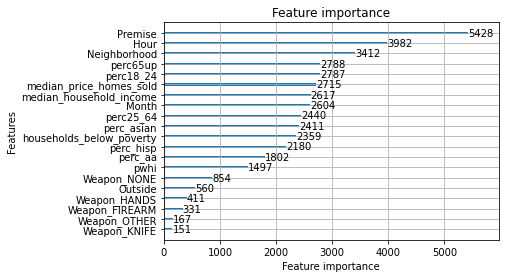

In [108]:
lgb.plot_importance(FINAL_RAW_IMP_MODEL)


In [115]:
FINAL_RAW_IMP_MODEL.booster_.save_model("MODEL_IMPUTED_DEMO.txt")

In [116]:
old_df = pd.read_csv("../data/BPD_CRIME_DATA_WITHDEMOGRAPHICS.csv")

In [118]:
temp_1 = old_df[old_df["median_price_homes_sold"].isna()]

In [119]:
temp_2 = old_df[old_df["median_household_income"].isna()]

In [122]:
len(temp_1)

151128

In [123]:
len(temp_2)

151128

In [124]:
test = old_df[old_df["median_price_homes_sold"].isna() & old_df["median_household_income"].isna()]

In [125]:
len(test)

151128

In [127]:
temp_1 = temp_1.reset_index()
temp_2 = temp_2.reset_index()

In [128]:
temp_1 == temp_2

,index,Unnamed: 0,Unnamed: 0.1,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,...,households_below_poverty,perc18_24,perc25_64,perc65up,perc_asian,perc_aa,perc_hisp,pwhi,num_households,median_price_homes_sold
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151123,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
151124,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
151125,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
151126,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


Looks like we'll have to do this exercise for all imputed neighborhoods.


In [129]:
temp_1["Neighborhood"].value_counts()


Patterson Park Neighborho    3265
Hamilton Hills               3165
Coldstream Homestead Mont    3161
McElderry Park               2900
Central Park Heights         2873
                             ... 
Villages Of Homeland           36
Greenmount Cemetery            23
Mt Pleasant Park               13
Blythewood                      4
Dundalk Marine Terminal         1
Name: Neighborhood, Length: 207, dtype: int64

## Just noticed an error. The "new" neighborhoods in the test data may be mispellings. McElderry vs Mcelderry...


# Also noticed inconsistencies in the naming conventions. Will have to redo demographic matching and imputation. Stopping here for this exercise and will redo later.........
